## Pre-processing of the Dataset "California house"

Goal:

- Create a new data set that can fit different kind of models, by removing the "NaN" and "String" variables.
- Get RMSE of different models to compare later with generated models

California house data set

Characteristics:
    - Number of instances: 1460
    - Additional informations available in data_description.txt
        
This is a copy of the Housing dataset:https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
It is used by students in machine learning looking to expand their skill set

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Exploring the Housing data set

### 1. Importing the data set

In [2]:
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (16, 6)
train_df = pd.read_csv('../Data/California_house/train.csv')

In [3]:
df = train_df
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

The dataset has 1460 rows and 81 columns, which means we have information over 1459 houses and 80 differents features (the last one being the Id). Now, we know what we will work with.

### 2. Data pre-processing

Most ML models can't handle specific type of data such as "NaN" (which means Not a Number and usualy stand for missig values) or "String". Therfore, we'll have to handle them by modifying our dataset.

Let's count the number of missing values of each features

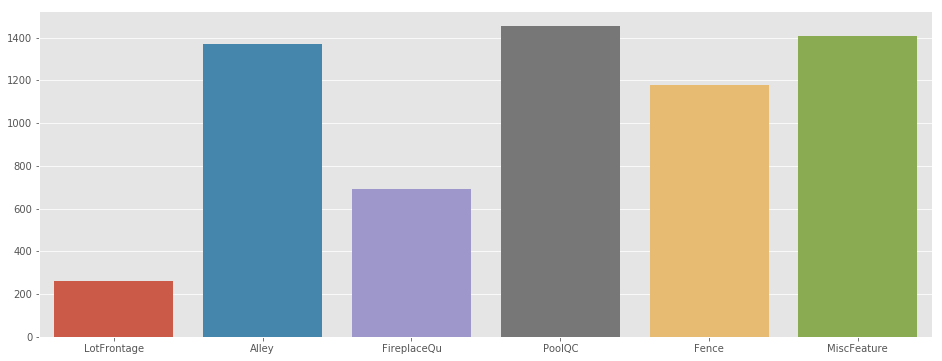

In [5]:
y_nan_values = []
x_nan_values = []
for col in df.columns:
    if(df[col].isna().sum()>200):
        y_nan_values.append(df[col].isna().sum())
        x_nan_values.append(col)
sns.barplot(x= x_nan_values, y=y_nan_values)


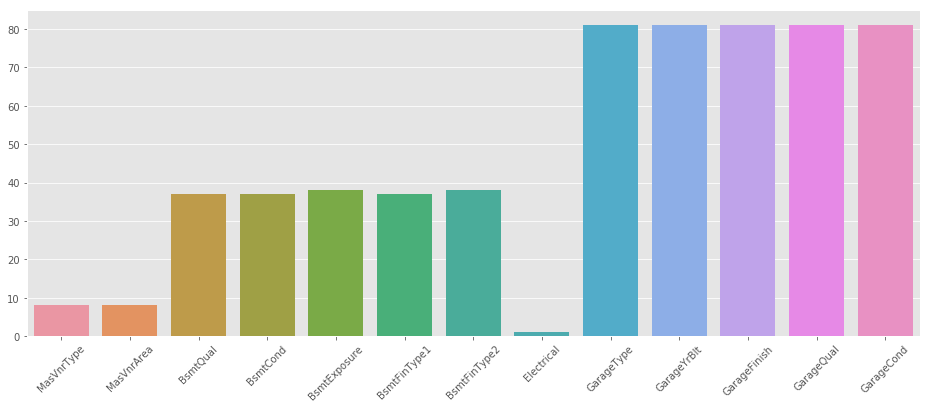

In [6]:
y_nan_values = []
x_nan_values = []
for col in df.columns:
    if(df[col].isna().sum()>0 and df[col].isna().sum()<200 ):
        y_nan_values.append(df[col].isna().sum())
        x_nan_values.append(col)
sns.barplot(x= x_nan_values, y=y_nan_values).set_xticklabels(x_nan_values, rotation=45);

From those graphs, we can deduce that the NaNs are giving us the information that this feature isn't part of the house. For example PoolQC with a NaN means there is no pool in this house. Thus we just have to replace them with a specific value that doens't overlap with any other value.

In [7]:
df = df.fillna(value = 0)

#### String values

Now that NaNs value are treated, we have to work on string values. 
We start by isolating each string features.

In [8]:
for x in df.columns:
    if (df[x].dtype == 'float64' or df[x].dtype == 'int64'):
        df = df.drop(x,axis=1)
    elif (x == 'SalePrice' or x == "Id"):
        df = df.drop(x,axis=1)
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,0,0,0,WD,Abnorml
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,0,0,0,WD,Normal


We create a dictionary for every feature with each unique value as the key and single numbers as the value. 

In [9]:
for col in df.columns:
    dic_of_value={}
    i = 0
    for x in pd.unique(df[col]):
        dic_of_value[x]=i
        i+=1
    df[col] = df[col].map(dic_of_value)

In [10]:
df.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,2,0,2,0,...,1,1,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,1,0,3,0,...,0,0,0,0,0,0,0,0,0,0


As we can see, each feature was indeed replace by numerical values corresponding to each unique value. We replace those columns in the working dataset

In [11]:
df = pd.concat([train_df.select_dtypes(np.number),df],axis=1)

In [12]:
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,0,0,0,0,0,0,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,0,0,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,0,0,0,0,0,0,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,1,1,0,0,0,0,0,0,0,1
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,0,0,0,0,0,0,0


Our dataset is now NaNs and strings free. We can begin our study.

### Exploratory Data Analysis

Visualizing the correlation matrix:

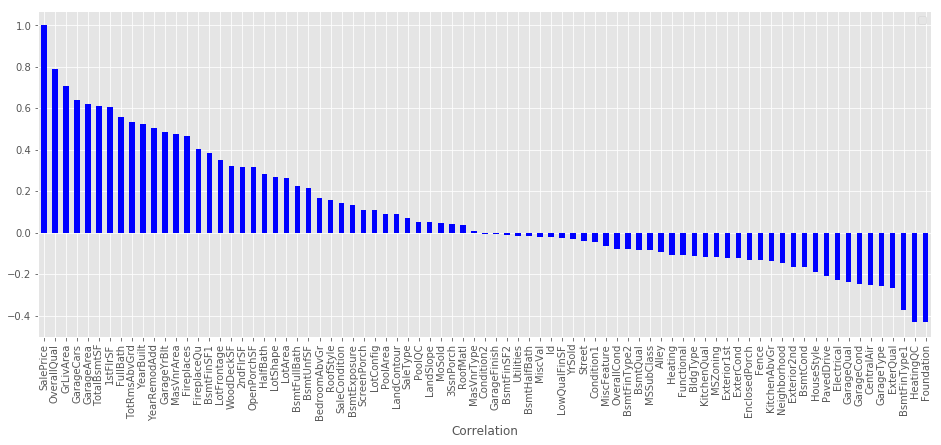

In [13]:
corr = df.corr()
corr_SalePrice = corr.SalePrice.sort_values(ascending=False)
corr_SalePrice.plot(kind='bar', color='blue')
plt.xlabel('Correlation')
plt.ylabel('')
plt.xticks(rotation=90)
plt.legend([])
plt.show()

Let's take a look at the most important features.

In [14]:
important_corr = corr['SalePrice'].sort_values(ascending=False)[:6].drop(labels='SalePrice')
important_corr = important_corr.append(corr['SalePrice'].sort_values(ascending=False)[-5:])
print(important_corr)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
GarageType     -0.255560
ExterQual      -0.265015
BsmtFinType1   -0.370971
HeatingQC      -0.427649
Foundation     -0.429678
Name: SalePrice, dtype: float64


In [15]:
list_of_important_features = []
for i in important_corr.index:
    list_of_important_features.append(i)
list_of_important_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'GarageType',
 'ExterQual',
 'BsmtFinType1',
 'HeatingQC',
 'Foundation']

Let's take a look at the visualisation of the different range price to have a better idea of what we should be expecting.

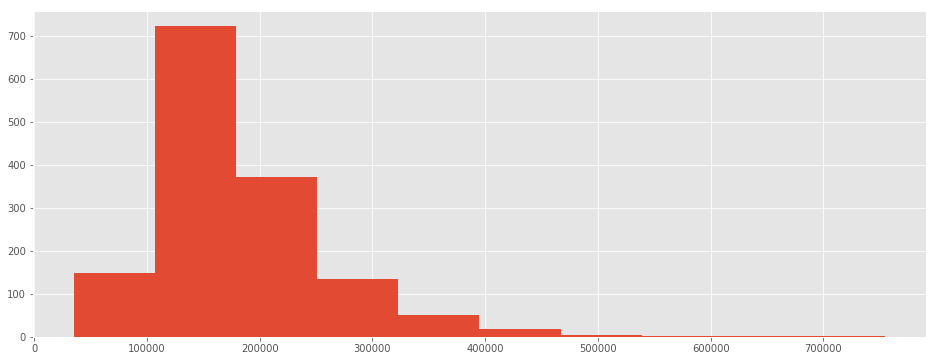

In [16]:
plt.hist(df.SalePrice)
plt.show()

OverallQual : Rates the overall material and finish of the house

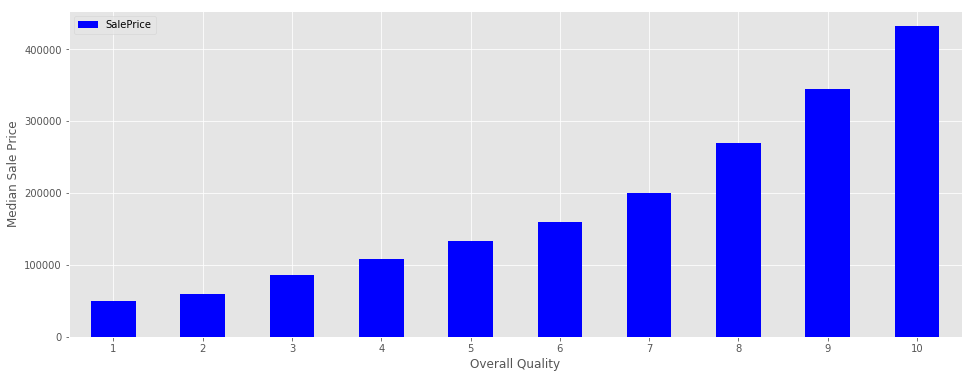

In [17]:
pivot = df.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can ideed see that the overall quality of the house is close to a perfect curve. But we have to be careful because there is a probability that this feature is a result of the mean of different other features.

GrLivArea: Above grade (ground) living area square feet

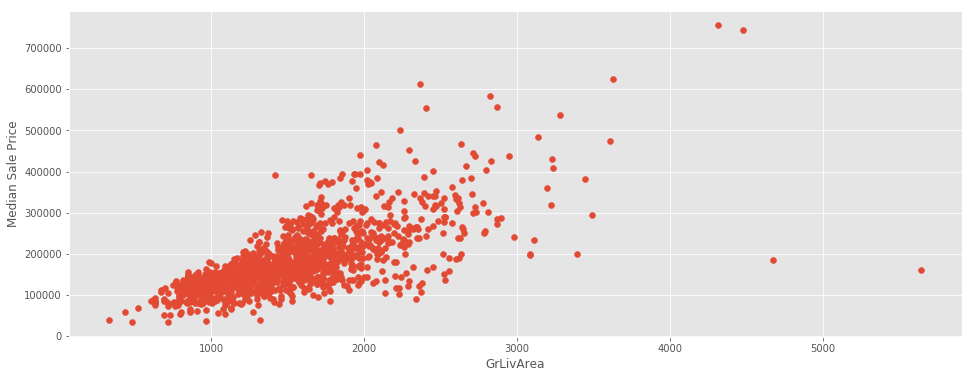

In [18]:
plt.scatter(x=df["GrLivArea"], y=df["SalePrice"])
plt.xlabel('GrLivArea')
plt.ylabel('Median Sale Price')
plt.show()

The number of square feet seems the best indicator of the pricing range for a house. But as we can see, there are some values not fitting it.

GarageCars: Size of garage in car capacity

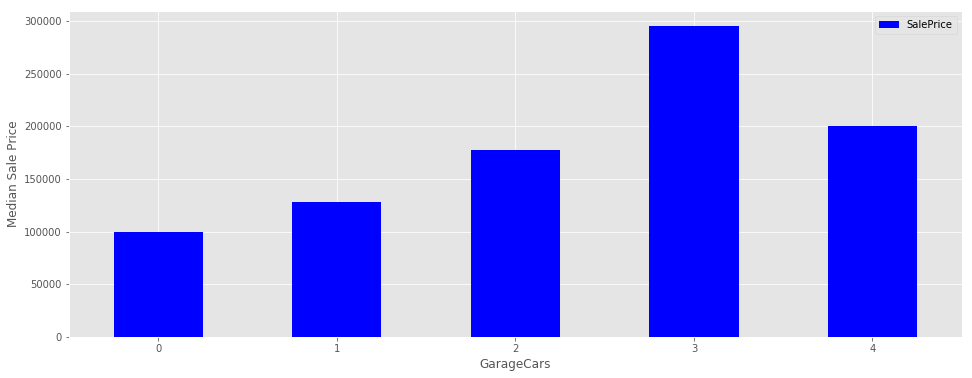

In [19]:
pivot = df.pivot_table(index='GarageCars',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('GarageCars')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

As we can see houses with place for 3 cars are more expensive than houses with four. We don't have any clear idea why it is the case, the most probable one being than most people don't need a garage able to fit that many car.

GarageArea: Size of garage in square feet

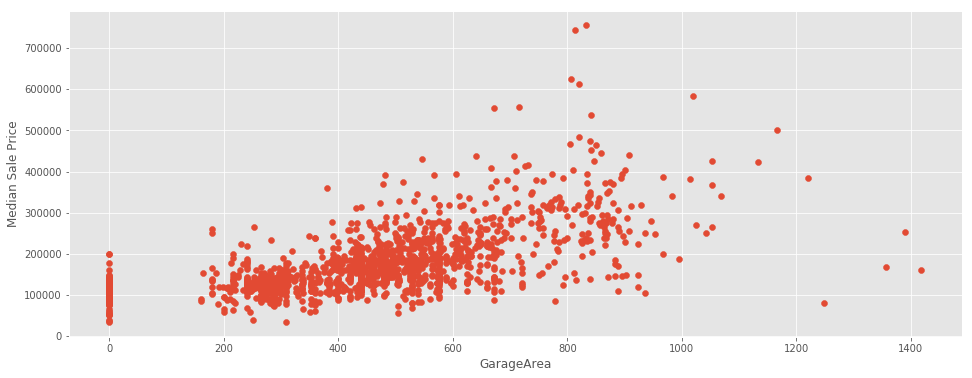

In [20]:
plt.scatter(x=df["GarageArea"], y=df["SalePrice"])
plt.xlabel('GarageArea')
plt.ylabel('Median Sale Price')
plt.show()

These graph confirm the overall results of the previous one, showing us that indeed, the price is peaking around before the maximum size and then falling down. It helps us understand why it is falling, because as we can see only few houses are above 1000 square feet.

TotalBsmtSF : Total square feet of basement area

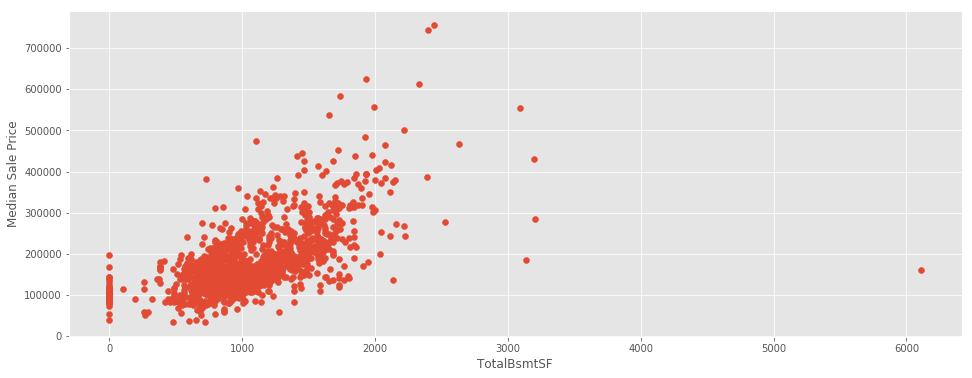

In [21]:
plt.scatter(x=df["TotalBsmtSF"], y=df["SalePrice"])
plt.xlabel('TotalBsmtSF')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

This information is complementary to "GrLivArea" but still has a much lower correlation, maybe because of the houses not having a basement making them having a value of 0 and the single one have a basement bigger than 6000 square feet.

GarageType: Garage location

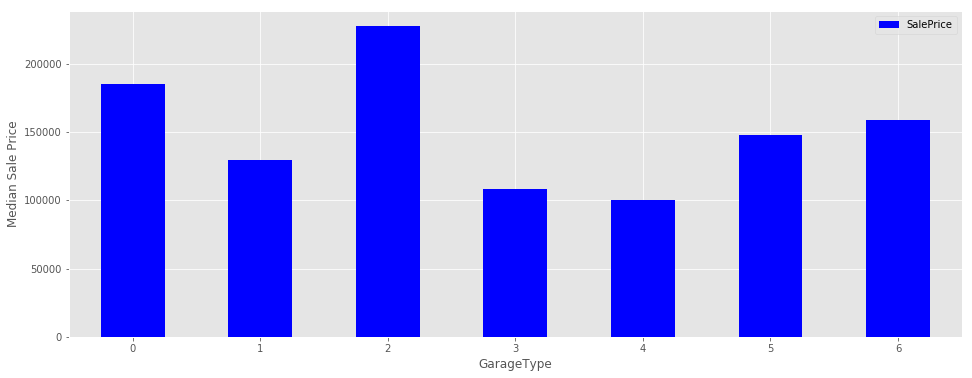

In [22]:
pivot = df.pivot_table(index='GarageType',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('GarageType')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

The correlation being negative, we can deduce that the most common location of garage is the most expensive and the less common is also the less expensive. But as we can see it is not as simple as that but still relatable.

ExterQual : Evaluates the quality of the material on the exterior

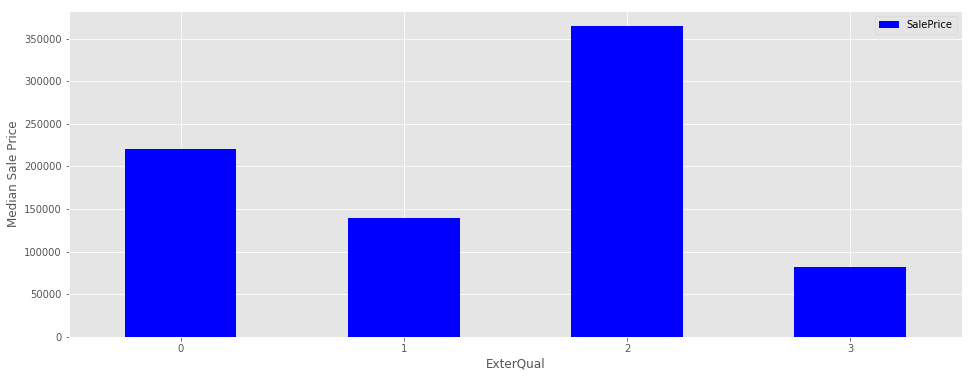

In [23]:
pivot = df.pivot_table(index='ExterQual',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('ExterQual')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

BsmtFinType1: Rating of basement finished area

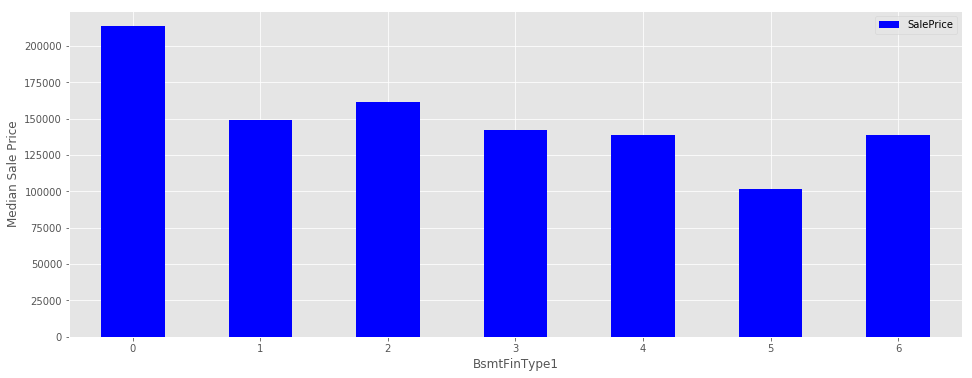

In [24]:
pivot = df.pivot_table(index='BsmtFinType1',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('BsmtFinType1')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

HeatingQC: Heating quality and condition

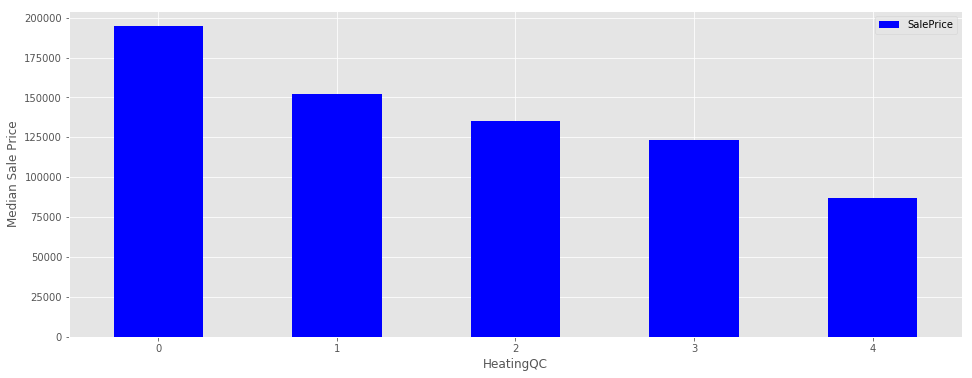

In [25]:
pivot = df.pivot_table(index='HeatingQC',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('HeatingQC')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Foundation: Type of foundation

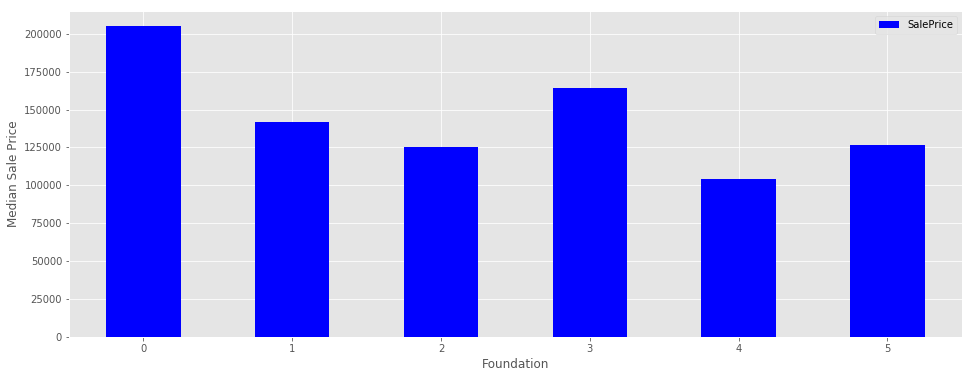

In [26]:
pivot = df.pivot_table(index='Foundation',
                  values='SalePrice', aggfunc=np.median)
pivot.plot(kind='bar', color='blue')
plt.xlabel('Foundation')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

We can remove GarageCars from our list being the same information that GarageArea but less precise.

In [27]:
list_of_important_features.remove("GarageCars")
print(list_of_important_features)

['OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'GarageType', 'ExterQual', 'BsmtFinType1', 'HeatingQC', 'Foundation']


We can now create a secondary dataset with only the most important featurs of our dataset.

In [28]:
df_of_intresting_features = df
for col in df_of_intresting_features.columns:
    if not col in list_of_important_features: 
        if col != 'SalePrice':
            df_of_intresting_features = df_of_intresting_features.drop(col,axis=1)
df_of_intresting_features.head()

,OverallQual,TotalBsmtSF,GrLivArea,GarageArea,SalePrice,ExterQual,Foundation,BsmtFinType1,HeatingQC,GarageType
0,7,856,1710,548,208500,0,0,0,0,0
1,6,1262,1262,460,181500,1,1,1,0,0
2,7,920,1786,608,223500,0,0,0,0,0
3,7,756,1717,642,140000,1,2,1,1,1
4,8,1145,2198,836,250000,0,0,0,0,0


### Creating our models

We unify the names of our columns

In [29]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]
df = df.drop(['LotFrontage'],axis=1)
df = df.drop(['MasVnrArea'],axis=1)
df = df.drop(['GarageYrBlt'],axis=1)

We define "SalePrice" as our feature to predict. Then, we split our data set in train and test data sets with a 33% ratio

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(['SalePrice'],axis=1)
y = df.SalePrice
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33)

X2 = df_of_intresting_features.drop(['SalePrice'],axis=1)
y2 = df_of_intresting_features.SalePrice
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, y2, test_size=0.33)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

knn2 = KNeighborsClassifier(n_neighbors = 3)
knn2.fit(X2_train, Y2_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [32]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)

gaussian2 = GaussianNB()
gaussian2.fit(X2_train, Y2_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_leaf_nodes=100,max_depth=50)
decision_tree.fit(X_train, Y_train)

decision_tree2 = DecisionTreeClassifier(max_leaf_nodes=100,max_depth=50)
decision_tree2.fit(X2_train, Y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=100,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=10)
random_forest.fit(X_train, Y_train)

random_forest2 = RandomForestClassifier(n_estimators=10)
random_forest2.fit(X2_train, Y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))
lasso.fit(X_train,Y_train)

lasso2 = make_pipeline(RobustScaler(), Lasso(alpha =0.0005))
lasso2.fit(X2_train,Y2_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 397534828048.727, tolerance: 669115093.4769983
  positive)


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lasso',
                 Lasso(alpha=0.0005, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [36]:
from sklearn.linear_model import ElasticNet
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(X_train,Y_train);

ENet2 = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet2.fit(X2_train,Y2_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414415393155.37195, tolerance: 669115093.4769983
  positive)


In [37]:
from sklearn.kernel_ridge import KernelRidge
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(X_train,Y_train);

KRR2 = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR2.fit(X2_train,Y2_train);

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=6.01688e-20): result may not be accurate.
  overwrite_a=False)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:188: LinAlgWarning: Ill-conditioned matrix (rcond=2.7001e-17): result may not be accurate.
  overwrite_a=False)


In [38]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(X_train,Y_train)

GBoost2 = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost2.fit(X2_train,Y2_train);

In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt  
lasso_rmse = sqrt(mean_squared_error(Y_test,lasso.predict(X_test)))
knn_rmse = sqrt(mean_squared_error(Y_test,knn.predict(X_test)))
random_forest_rmse = sqrt(mean_squared_error(Y_test,random_forest.predict(X_test)))
gaussian_rmse = sqrt(mean_squared_error(Y_test,gaussian.predict(X_test)))
decision_tree_rmse = sqrt(mean_squared_error(Y_test,decision_tree.predict(X_test)))
ENet_rmse = sqrt(mean_squared_error(Y_test,ENet.predict(X_test)))
KRR_rmse = sqrt(mean_squared_error(Y_test,KRR.predict(X_test)))
GBoost_rmse = sqrt(mean_squared_error(Y_test,GBoost.predict(X_test)))

lasso_rmse2 = sqrt(mean_squared_error(Y2_test,lasso2.predict(X2_test)))
knn_rmse2 = sqrt(mean_squared_error(Y2_test,knn2.predict(X2_test)))
random_forest_rmse2 = sqrt(mean_squared_error(Y2_test,random_forest2.predict(X2_test)))
gaussian_rmse2 = sqrt(mean_squared_error(Y2_test,gaussian2.predict(X2_test)))
decision_tree_rmse2 = sqrt(mean_squared_error(Y2_test,decision_tree2.predict(X2_test)))
ENet_rmse2 = sqrt(mean_squared_error(Y2_test,ENet2.predict(X2_test)))
KRR_rmse2 = sqrt(mean_squared_error(Y2_test,KRR2.predict(X2_test)))
GBoost_rmse2 = sqrt(mean_squared_error(Y2_test,GBoost2.predict(X2_test)))

In [43]:
models = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'RMSE': [knn_rmse ,random_forest_rmse , gaussian_rmse , decision_tree_rmse ,lasso_rmse ,ENet_rmse ,KRR_rmse ,GBoost_rmse]})
models.sort_values(by='RMSE', ascending=True)

,Model,RMSE
7,GBoost,29478.928140
5,ENet,33962.414192
4,Lasso,33975.571196
2,Naive Bayes,45776.723235
3,Decision Tree,53773.183430
0,KNN,58285.152978
1,Random Forest,68793.494695
6,KernelRidge,356954.842297


In [44]:
models2 = pd.DataFrame({
    'Model': ['KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree','Lasso','ENet','KernelRidge','GBoost'],
    'RMSE': [knn_rmse2 ,random_forest_rmse2 , gaussian_rmse2 , decision_tree_rmse2 ,lasso_rmse2 ,ENet_rmse2 ,KRR_rmse2 ,GBoost_rmse2]})
models2.sort_values(by='RMSE', ascending=True)

,Model,RMSE
7,GBoost,32773.665612
6,KernelRidge,35834.273326
4,Lasso,36406.977070
5,ENet,36407.243727
1,Random Forest,50289.107874
2,Naive Bayes,50450.790283
3,Decision Tree,55250.529663
0,KNN,57296.774768


### Conclusion

By creating a leaderboard with model by their RMSE, we observe:

   - The Kernel Ridge model is doing extremly bad if we don't remove less important features
   - The average RMSE (removing the extreme ones) is around 45 000 but is better with less columns
   - GBoost have the best RMSE (29 478) which fall down if we remove less important features

We save our processed data set to use it with our Auto-ML models

In [ ]:
df.to_csv('../Data/California_house/no_string_no_nan.csv',index=False)

In [45]:
df_of_intresting_features.to_csv('../Data/California_house/no_string_no_nan_only_important.csv',index=False)